<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module00_03_pyplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Matrices and Matplotlib

In [1]:
import matplotlib.pyplot as plt

Let's work with some data showing miles-per-gallon for cars manufactured in particular years

In [2]:
mpg = [22, 25, 20, 32, 19, 42, 28]
mpg

[22, 25, 20, 32, 19, 42, 28]

But, what about the years?

In [3]:
years = [2010, 2012, 2013, 2012, 1999, 2014, 2004]
years

[2010, 2012, 2013, 2012, 1999, 2014, 2004]

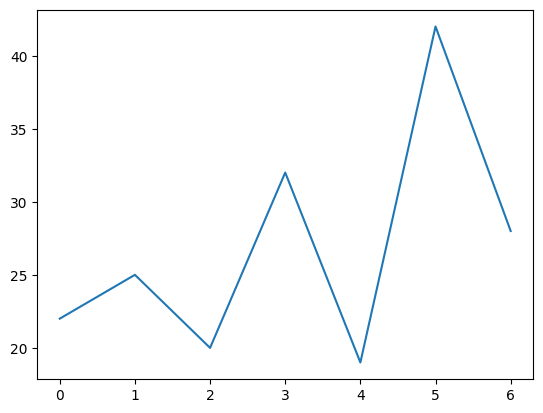

In [4]:
plt.plot(mpg);

Not really what we want.  Want to plot mpg on y axis and year on x axis.

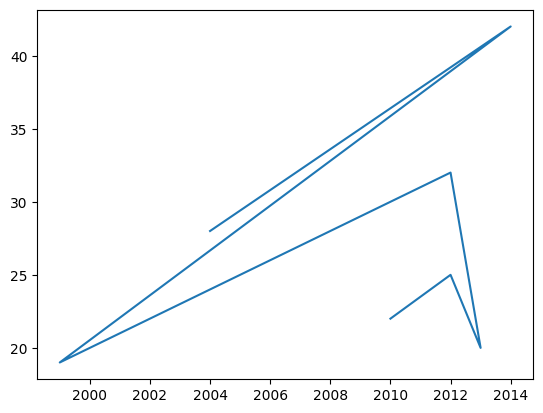

In [5]:
plt.plot(years, mpg);

Oops! We want individual points, not connect-the-dots!

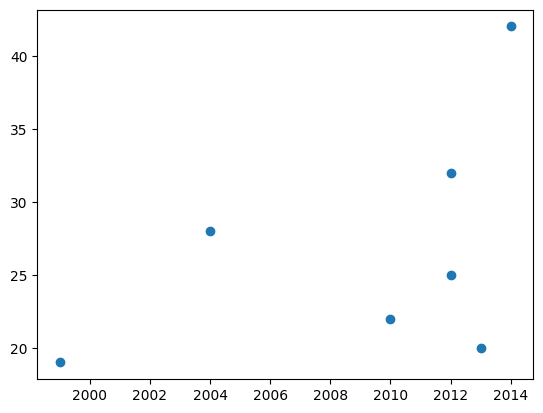

In [6]:
plt.plot(years, mpg,'o'); # arg3 ('o') is the visualiation of points; try 'x' or '+' or '.' (or '-')

Is there a linear relationship here?  How can I draw a line through this graph and play with its parameters?

In [7]:
def line(x, slope, yintercept):
    # given x, a slope, and a y-intercept, return f(x) = mx+b
    return x * slope + yintercept

In [8]:
# specify slope and y-intercept
s = 3
yint = -5990

# return f(1998) - mpg of 1998 car according to this function
line(1998, s, yint)

4

In [9]:
# return f(2014) - mpg of 2014 car according to this function
line(2014, s, yint)

52

In [10]:
for y in years:
    print(y)

2010
2012
2013
2012
1999
2014
2004


In [11]:
ys = []
# populate "ys" with f(y) for each y in years
for y in years:
    ys.append(line(y, s, yint))
ys

[40, 46, 49, 46, 7, 52, 22]

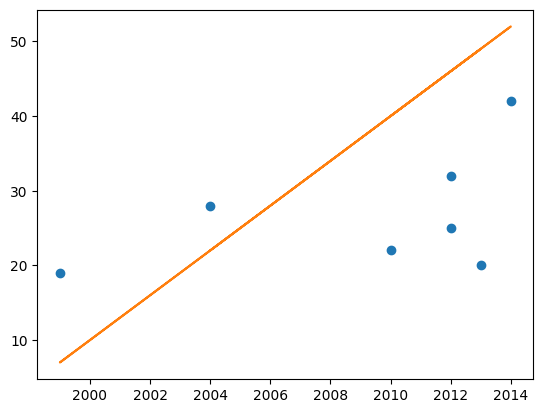

In [12]:
# plot mpg points
plt.plot(years, mpg, 'o');
# plot "ys" as line
plt.plot(years, ys);

Wow! That's a pain!  First of all, let's jump into the wonderful world of matrices.  We can often replace for loops with single matrix calculations.

In [13]:
import numpy as np

In [14]:
# convert mpg to numpy array
mpg = np.array([22, 25, 20, 32, 19, 42, 28])
mpg

array([22, 25, 20, 32, 19, 42, 28])

In [15]:
# convert years to numpy array
years = np.array([2010, 2012, 2013, 2012, 1999, 2014, 2004])
years

array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

Watch this!  Our function, ```line```, just returns ```x * slope + yintercept```.  If each of these variables actually contain ```numpy``` arrays of the same shape, the operations will automatically be applied component-wise.

In [ ]:
line(years, s, yint)

array([40, 46, 49, 46,  7, 52, 22])

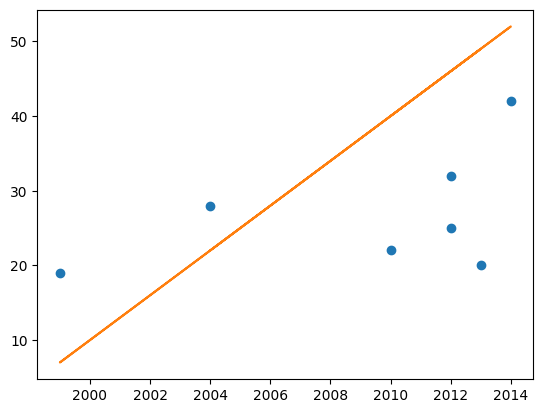

In [16]:
plt.plot(years, mpg, 'o')
plt.plot(years, line(years, s, yint));

Works, but remember the x values are not in order.  If all values did not fall in a line, we would not see a nice function plot.  We can make this more obvious by adding some noise to each estimated y value.

In [ ]:
np.random.rand?

In [17]:
years.shape

(7,)

In [18]:
# create an np array of shape (7,)
# rand samples distribution between [0,1), so let's scale everything up by a factor of 10
noise = np.random.rand(7) * 10
noise

array([9.5573355 , 2.58371522, 2.92898058, 1.07460629, 5.674001  ,
       9.72211289, 7.11729495])

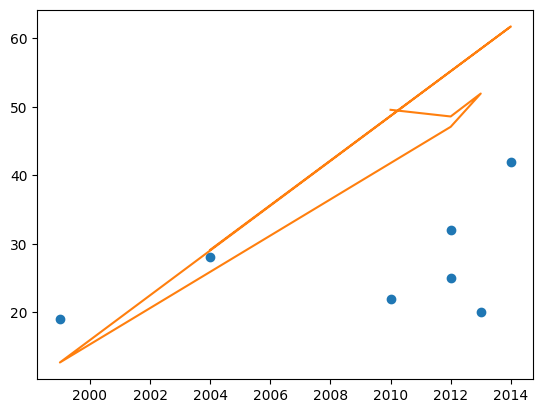

In [19]:
# plot mpg points
plt.plot(years, mpg, 'o')
# plot years line but add noise (added element-wise)
plt.plot(years, line(years, s, yint) + noise)

Now it is clear we need to order our data by year.

In [20]:
print(np.sort(years))
years

[1999 2004 2010 2012 2012 2013 2014]


array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

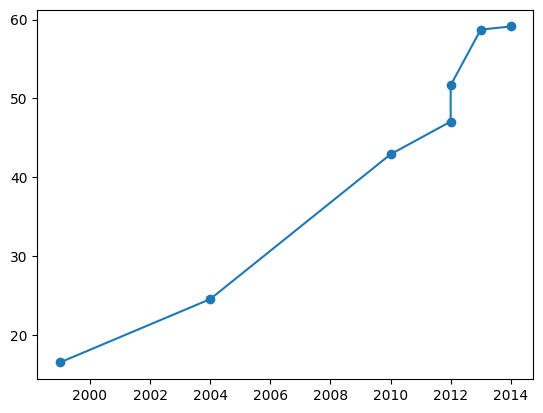

In [21]:
yearsSorted = np.sort(years)
plt.plot(yearsSorted, line(yearsSorted, s, yint) + noise, 'o-')

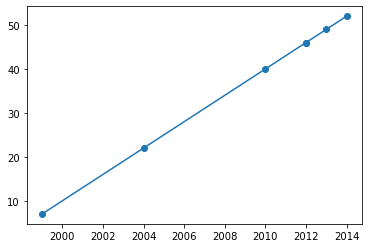

In [ ]:
yearsSorted = np.sort(years)
plt.plot(yearsSorted, line(yearsSorted, s, yint), 'o-')

But we have two (parallel) arrays.  We can find the order of indices that will arrange years in ascending order, and apply the indices to the years.

In [ ]:
np.argsort?

In [ ]:
order = np.argsort(years)
order

array([4, 6, 0, 1, 3, 2, 5], dtype=int64)

This array contains the indices in "years" that, if ordered by these, "years" would be in ascending order.

In [ ]:
years

array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

In [ ]:
# compare years (unordered) to mpg (unordered)
years, mpg

(array([2010, 2012, 2013, 2012, 1999, 2014, 2004]),
 array([22, 25, 20, 32, 19, 42, 28]))

This is a mess!

In [ ]:
years[order], mpg[order]

(array([1999, 2004, 2010, 2012, 2012, 2013, 2014]),
 array([19, 28, 22, 25, 32, 20, 42]))

Better.

It is too easy to make errors with parallel arrays.  Instead, let's combine our year-mpg samples into a matrix with each row being one sample.

In [ ]:
np.stack((years, mpg))

array([[2010, 2012, 2013, 2012, 1999, 2014, 2004],
       [  22,   25,   20,   32,   19,   42,   28]])

In [ ]:
np.stack?

In [ ]:
np.stack((years, mpg), axis=0).shape # print the shape of the stack arrays

(2, 7)

In [ ]:
np.stack((years, mpg), axis=1)

array([[2010,   22],
       [2012,   25],
       [2013,   20],
       [2012,   32],
       [1999,   19],
       [2014,   42],
       [2004,   28]])

In [ ]:
data = np.stack((years, mpg), axis=1)

In [ ]:
data[0, 0]

2010

In [ ]:
data[0, :]

array([2010,   22])

In [ ]:
data[:, 0] # this is "years"

array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

In [ ]:
data[:, 1] # this is "mpg"

array([22, 25, 20, 32, 19, 42, 28])

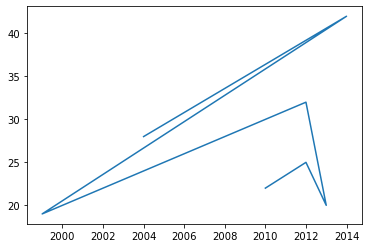

In [ ]:
plt.plot(data[:, 0], data[:, 1]) # plot mpg vs years

Oh, no!  We've got this mess again.  Forgot to sort!

In [ ]:
order = np.argsort(data[:, 0])
order

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [ ]:
# order the data
data = data[order, :]
data

array([[1999,   19],
       [2004,   28],
       [2010,   22],
       [2012,   32],
       [2012,   25],
       [2013,   20],
       [2014,   42]])

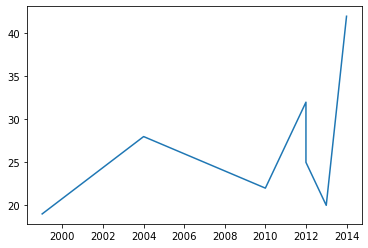

In [ ]:
# now we can plot data row 1 (mpg) vs. data row 0 (years)
plt.plot(data[:, 0], data[:, 1]);

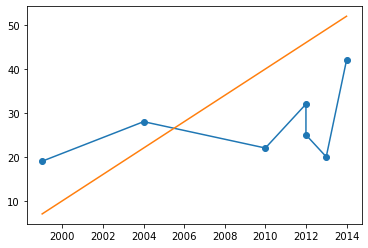

In [ ]:
# plot mpg vs. years (properly ordered)
plt.plot(data[:, 0], data[:, 1], '-o');
# now for each point y in years (row 0 in "data"), plot f(y)
plt.plot(data[:, 0], line(data[:, 0], s, yint));

Now, we have the basics of defining functions, collecting data samples in a matrix, and plotting them.  Time to automate the fitting of a line to the data&ndash;linear regression!